# Midterm 3 Review
### ECE204 Data Science & Engineering

### 1) Classification

#### Short-answer questions
* What type of label does a classification problem predict?
* Once a decision tree classifier has been trained, how does it generate predictions for unlabeled data?
* How does a nearest neighbor classifier generate a prediction for unlabeled data?

#### Coding questions

**Problem 1.**
Train a decision tree classifier on the `airports.csv` dataset with `random_state=42` and `max_depth=4`. Predict the state from the latitude and longitude. **Which is the more important feature: latitude or longitude?**

*Hint:* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [1]:
import pandas as pd
df = pd.read_csv("airports.csv")
df.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df[["latitude", "longitude"]]
y = df["state"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [3]:
# your code here

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

array([0.6240954, 0.3759046])

---
**Problem 2.** **Using the same datasets and model, what is the accuracy of the model?**

In [4]:
# your code here


The question asks for the "accuracy of the model." This value summarizes the quality of the model. The goal is to predict well on *unseen* data, so it only makes sense to report the accuracy on the **unseen test data** (unless specifically asked about training or validation accuracy).

In [5]:
# solution - 1
model.score(X_test, y_test)

0.3143712574850299

In [6]:
# solution - 2
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.3143712574850299

In [7]:
# solution - 3
(y_pred == y_test).sum() / len(y_test)

0.3143712574850299

---

### 2) Regression

#### Short-answer questions
* What type of variables do regression problems predict?
* What is a residual?
* How can you interpret the regression coefficients (the $\beta_i$ coefficients)

#### Coding questions

**Problem 1.** 
Read in the "housing.csv" dataset. Predict the price from **all** the other features. **What is the coefficient of determination (R-squared, or $R^2$) value?**

Use the provided test and train set when reporting your answer.

*Hint:* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [8]:
df = pd.read_csv("housing.csv")
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,lat,long,price
0,3,1.00,1180,5650,1.0,0,3,7,0,47.5112,-122.257,221900
1,3,2.25,2570,7242,2.0,0,3,7,400,47.7210,-122.319,538000
2,2,1.00,770,10000,1.0,0,3,6,0,47.7379,-122.233,180000
3,4,3.00,1960,5000,1.0,0,5,7,910,47.5208,-122.393,604000
4,3,2.00,1680,8080,1.0,0,3,8,0,47.6168,-122.045,510000


In [9]:
from sklearn.linear_model import LinearRegression
X = df[[c for c in df.columns if c != "price"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [10]:
# your code here


The documentation for `LinearRegression.score()` mentions that it returns the $R^2$ value. Let's use that:

In [11]:
# solution - 1
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6551934466616351

This is also available through the `r2_score` in the Scikit-Learn metrics:

In [12]:
# solution - 2
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.6551934466616351

Note: `r2_score` is not symmetric. That is, `r2_score(y_test, y_pred) != r2_score(y_pred, y_test)`. `model.score` uses `r2_score(y_test, y_pred)`, which is the **right** way to use `r2_score`.

---
**Problem 2.**
Using the same dataset and model, **what's the residual sum of squares (RSS) on the training set?** Compute it in two different ways:
* by computing the residuals, squaring them, and summing them up
* by using the `mean_squared_error` built-in function (careful! this computes the **mean** of the squared residuals instead of the **sum**)

See if you can get the same answer in two different ways!

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
# your code here



This questions asks about the value of the *train* dataset. This is a little unusual; normally, quality is determined from the test set. However, we ask this question because `LinearRegression`'s `fit` minimizes the "mean squared error" or "sum of squared residuals". That is, the "sum of squared residuals" for the train set can not possibly be any lower than reported.

For $n$ examples, the Scikit-Learn metric `mean_squared_error` calculates

$$\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

with prediction $\hat{y}_i$ for example $i$ with ground truth label $y_i$. This could equivalently be called "squared mean of residuals". If multiplied by $n$, this is exactly the RSS.

In [15]:
# solution - 1
y_hat = model.predict(X_train)
mean_squared_error(y_hat, y_train) * len(y_hat)

876415238127599.2

This can also be directly calculated:

In [16]:
# solution - 2
errs = (y_hat - y_train)**2
errs.sum()

876415238127599.2

---

### 3) Model selection

**Principle for model selection:** only evaluate model performance on examples it has never seen.

#### Short answer questions

* What are hyper-parameters?
* Why shouldn't the same dataset be used to train a model and evaluate performance of that model? (the data used to train a model is the "train data", and the data used to evaluate the performance is the "test data") 
* Explain the difference between a **training set**, a **validation set** and a **testing set**.
   

#### Coding questions
These questions will use a synthetic dataset. 

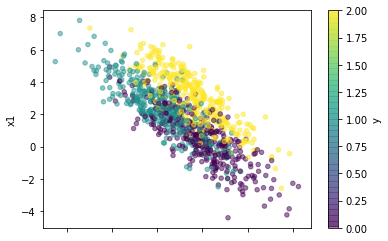

In [17]:
from sklearn.datasets import make_blobs
import sklearn.datasets as datasets
import numpy as np

X, y = datasets.make_blobs(n_samples=1000, random_state=190, cluster_std=2.0)
# Try out different datasets:
#X, y = datasets.make_blobs(n_samples=1000, random_state=170, cluster_std=2.0)
#X, y = datasets.make_blobs(n_samples=1000, random_state=120, cluster_std=2.0)

transformation = [[0.6, -0.3], [-0.4, 0.8]]
X = np.dot(X, transformation)
df = pd.DataFrame({"x0": X[:, 0], "x1": X[:, 1], "y": y})
df.plot.scatter(x="x0", y="x1", c="y", cmap="viridis", alpha=0.5)

---
**Problem 1.**
Using a decision tree classifier, **what's the cross validation score for `max_depth=3` using 5-fold cross validation on the train set?** Use `random_state=42` for the DecisionTreeClassifier.

Here is a visual showing K-Fold Cross Validation:
![K-Fold Cross Validation](cv_visual.png)

More detail is at https://scikit-learn.org/stable/modules/cross_validation.html.

In [18]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# your code here

dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
cv_score = cross_val_score(dtree, X_train, y_train, cv=5).mean()
print(cv_score.round(4))

0.6513


---
**Problem 2.**
**What's the best value for `max_depth` on the train set?**

Train the model with `max_depth` from 1 to 10 inclusive. Use 5-fold cross-validiton with `cv=5` and `random_state=42` for the `DecisionTreeClassifier`.

Text(0.5, 0, 'max_depth')

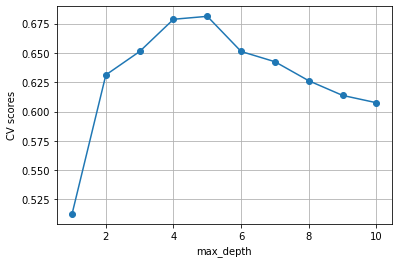

In [23]:
# Your code here

s = []
for depth in range(1, 11):
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    s.append(cross_val_score(dtree, X_train, y_train, cv=5).mean())
    
S = pd.Series(s, index = range(1,11))
ax = S.plot(style = 'o-', grid=True)
ax.set_ylabel('CV scores')
ax.set_xlabel('max_depth')

In [21]:
best_depth = S.idxmax()
print('Best max_depth = ', best_depth )

Best max_depth =  5


---
**Problem 3.**
**What's the accuracy of the classifier with the best `max_depth` found above?**

Retrain the classifier using `random_state=42` and report the accuracy *on the test set*.

In [22]:
# Your code here

dtree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dtree.fit(X_train, y_train)
print(dtree.score(X_test, y_test))

0.645


---